### Notebook to preprocess the data from Sun_2020/Wang(eLife)
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE161382

### Import required modules

In [1]:
import anndata
import numpy as np
import pandas as pd
import scanpy as sc

- Set up working environment

In [2]:
sc.settings.verbosity = 3
# sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 200, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

### Read in dataset

In [3]:
# genes = pd.read_csv('GSE161382/features.tsv', sep='\t', header=None)
# genes[1] = genes[1].str.replace('\"', '')
# genes[1] = '_' + genes[1]
# genes.to_csv('GSE161382/features.tsv.gz', compression='gzip', header=None, sep='\t')


In [4]:
# barcodes = pd.read_csv('GSE161382/barcodes.tsv.gz', sep='\t', header=None, skiprows=1)
# barcodes[[1]].to_csv('GSE161382/barcodes.tsv.gz', compression='gzip', header=None, sep='\t', index=None)

In [5]:
# # barcodes = pd.read_csv('GSE161382/barcodes.tsv.gz', sep='\t', header=None)
# genes = pd.read_csv('GSE161382/features.tsv.gz', sep='\t', header=None)
# genes[[1, 2]].to_csv('GSE161382/features.tsv.gz', compression='gzip', header=None, sep='\t', index=None)

In [6]:
adata = sc.read_mtx('GSE161382/matrix.mtx.gz')
adata = adata.T

In [7]:
barcodes = pd.read_csv('GSE161382/GSE161382_barcodes.tsv.gz', sep='\t', header=None, skiprows=1)
# barcodes[[1]].to_csv('GSE161382/barcodes.tsv.gz', compression='gzip', header=None, sep='\t', index=None)
adata.obs.index = list(barcodes[1])

In [8]:
genes = pd.read_csv('GSE161382/features.tsv.gz', sep='\t', header=None)
adata.var.index = list(genes[1])

In [9]:
umap = pd.read_csv('GSE161382/GSE161382_UMAP_coord.tsv.gz', sep='\t')
meta = pd.read_csv('GSE161382/GSE161382_metadata.txt.gz', sep=' ')

In [10]:
donor_by_sample = {'GSM4906346': 'D150',
                    'GSM4906347': 'D088',
                    'GSM4906348': 'D062',
                    'GSM4906349': 'D032',
                    'GSM4906350': 'D046',
                    'GSM4906351': 'D139',
                    'GSM4906352': 'D122',
                    'GSM4906353': 'D175',
                    'GSM4906354': 'D231'}
sample_by_donor = {donor: sample for sample, donor in donor_by_sample.items()}


In [11]:
assert sum(adata.obs.index == umap.index) == umap.shape[0]
assert sum(adata.obs.index == meta.index) == meta.shape[0]

In [12]:
adata.obsm['X_umap'] = umap.to_numpy()
adata.obs = meta

In [13]:
sc.set_figure_params(facecolor='white', dpi=150)

### Is `adata.X` raw?

In [14]:
adata.X[:100,:100].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 3.]], dtype=float32)

In [15]:
import pandas as pd
pd.Series(adata.X[:,1:100].A.flatten()).value_counts()

0.0     4380483
1.0      181653
2.0       28865
3.0        7766
4.0        2685
5.0        1113
6.0         495
7.0         225
8.0         103
9.0          51
10.0         20
11.0         12
13.0          9
12.0          7
14.0          4
16.0          2
17.0          2
15.0          2
21.0          1
19.0          1
22.0          1
dtype: int64

**It looks like to be integers**

### Add basic labels

In [16]:
ad = adata

In [17]:
ad.obs['dataset'] = 'Sun2020'
ad.obs['study'] = 'Sun2020'
ad.obs['original_celltype_ann'] = ad.obs['celltype']
adata.obs['subject_ID'] = adata.obs_names.str.split('_').str[0]
adata.obs['genome'] = 'hg19'
adata.obs['study'] = 'Wang2020'
# ad.obs['condition'] = 'disease'
ad.obs['sample'] = ad.obs['donor'].map(sample_by_donor)

In [18]:
ad.obs['sex'] = ad.obs['sex'].map({'M': 'male', 'F': 'female'})
ad.obs['age'] = ad.obs['age'].map({'3yr': 3, '31yr': 31, '31wk': 0})

In [19]:
ad.obs['original_celltype_ann'] = np.where(ad.obs['original_celltype_ann'] == 'PNECs', 'pulmonary neuroendocrine cells', ad.obs['original_celltype_ann'])

In [20]:
ad.obs['original_celltype_ann'].value_counts()

Alveolar macrophages              7620
alveolar type 2 cells             7226
matrix fibroblast 1               4071
alveolar type 1 cells             3618
T cells                           3100
matrix fibroblast 2               3002
monocytes                         2645
unclassified                      2206
club cells                        1291
Interstitial macrophages          1148
Cap1                              1080
NK cells                          1071
B cells                           1034
lymphatics                         887
pericytes                          803
Cap2                               800
AT1/AT2-like                       794
ciliated cells                     666
myofibroblasts                     558
airway smooth muscle               449
AT2/Club-like                      425
chondrocytes                       394
goblet cells                       235
basal cells                        204
dendritic cells                    203
enucleated erythrocytes  

In [21]:
adata.obs['batch'] = adata.obs['batch'].astype('category')

... storing 'orig.ident' as categorical
... storing 'sex' as categorical
... storing 'donor' as categorical
... storing 'celltype' as categorical
... storing 'lineage' as categorical
... storing 'dataset' as categorical
... storing 'study' as categorical
... storing 'original_celltype_ann' as categorical
... storing 'subject_ID' as categorical
... storing 'genome' as categorical
... storing 'sample' as categorical


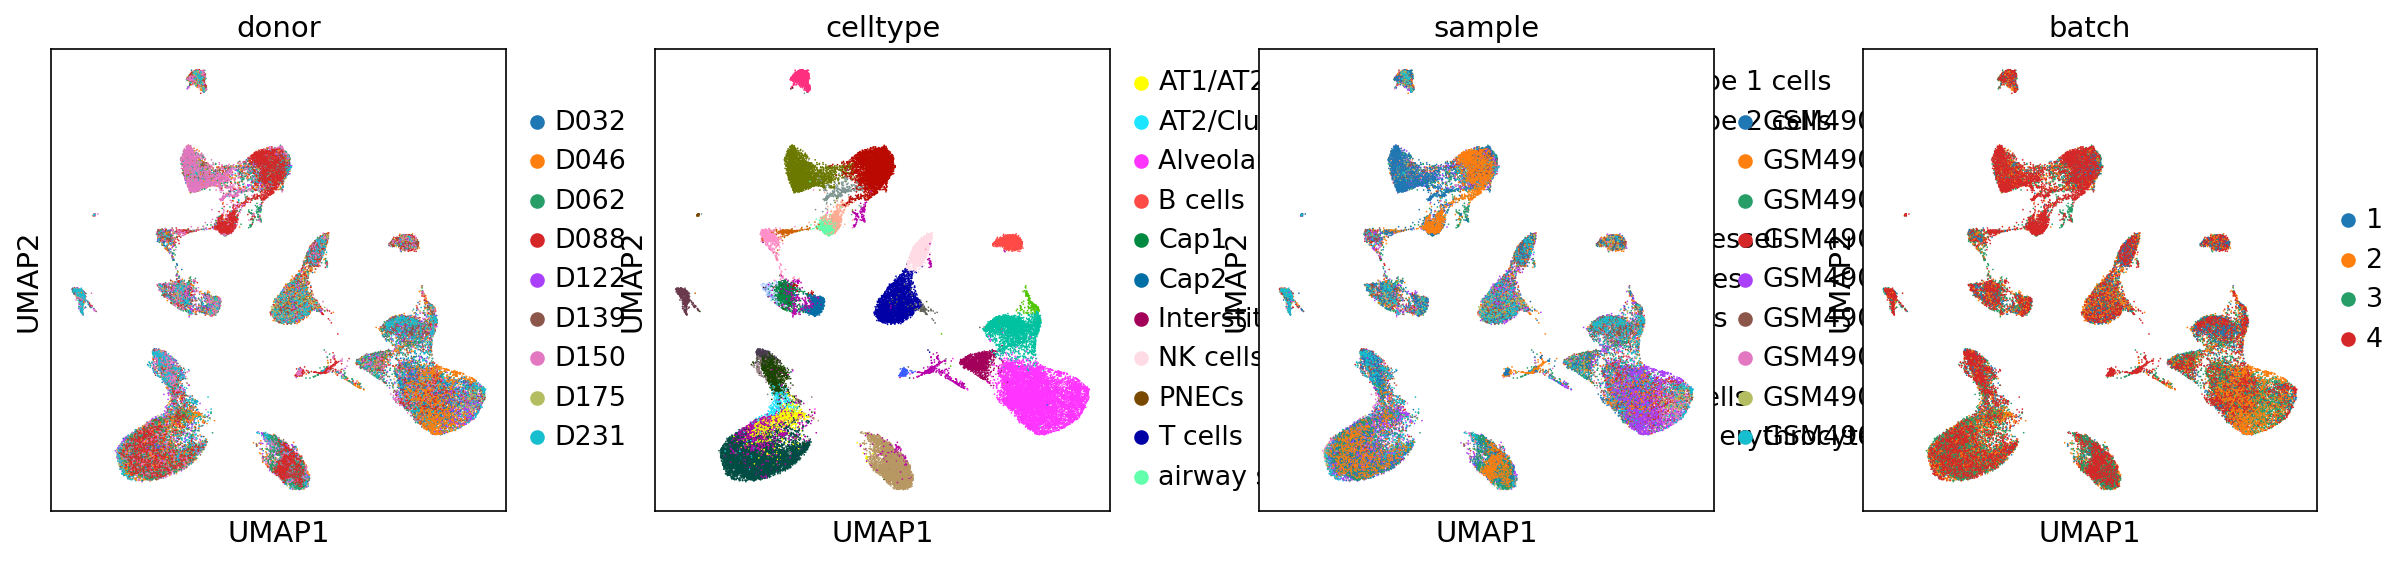

In [22]:
sc.pl.umap(adata, color=['donor', 'celltype', 'sample', 'batch'])

In [23]:
ad.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,seurat_clusters,age,sex,donor,batch,celltype,lineage,dataset,study,original_celltype_ann,subject_ID,genome,sample
D032_AACAAGACAGCCCACA,D032,5986,2531,0,3,male,D032,3,Alveolar macrophages,Immune,Sun2020,Wang2020,Alveolar macrophages,D032,hg19,GSM4906349
D032_AACAGGGGTCCAGCGT,D032,2146,1243,0,3,male,D032,3,Alveolar macrophages,Immune,Sun2020,Wang2020,Alveolar macrophages,D032,hg19,GSM4906349
D032_AACGAAAGTTCCATTT,D032,1010,636,0,3,male,D032,3,Alveolar macrophages,Immune,Sun2020,Wang2020,Alveolar macrophages,D032,hg19,GSM4906349
D032_AAGCATCGTGGCTTGC,D032,4669,2228,0,3,male,D032,3,Alveolar macrophages,Immune,Sun2020,Wang2020,Alveolar macrophages,D032,hg19,GSM4906349
D032_AAGTTCGTCAGGAACG,D032,3344,1809,7,3,male,D032,3,monocytes,Immune,Sun2020,Wang2020,monocytes,D032,hg19,GSM4906349


In [24]:
ad.write('Wang2020.raw.h5ad', compression='lzf')

### Subset datasets to Sikkema's HVGs 

In [25]:
def subset_and_pad_adata(adata, gene_set):
    """
    This function uses a gene list provided as a Pandas dataframe with gene symbols and
    Ensembl IDs and subsets a larger Anndata object to only the genes in this list. If
    Not all genes are found in the AnnData object, then zero-padding is performed.
    """
    # Example inputs:
    # genes_filename = '/storage/groups/ml01/workspace/hlca_lisa.sikkema_malte.luecken/genes_for_mapping.csv'
    # data_filename = '/storage/groups/ml01/workspace/hlca_lisa.sikkema_malte.luecken/ready/adams.h5ad'
    # gene_set = pd.read_csv(genes_filename)
    # adata = sc.read(data_filename)

    # Prep objects
    if 'gene_symbols' in gene_set.columns:
        gene_set.index = gene_set['gene_symbols']

    else:
        raise ValueError('The input gene list was not of the expected type!\n'
                         'Gene symbols and ensembl IDs are expected in column names:\n'
                         '\t`gene_symbols` and `Unnamed: 0`')

    # Subset adata object
    common_genes = [gene for gene in gene_set['gene_symbols'].values if gene in adata.var_names]
    if len(common_genes) == 0:
        print("WARNING: YOU SHOULD PROBABLY SWITCH YOUR ADATA.VAR INDEX COLUMN TO GENE NAMES"
                  " RATHER THAN IDS! No genes were recovered.")
        return

    adata_sub = adata[:,common_genes].copy()

    # Pad object with 0 genes if needed
    if len(common_genes) < len(gene_set):
        diff = len(gene_set) - len(common_genes)
        print(f'not all genes were recovered, filling in 0 counts for {diff} missing genes...')
        
        # Genes to pad with
        genes_to_add = set(gene_set['gene_symbols'].values).difference(set(adata_sub.var_names))
        new_var = gene_set.loc[genes_to_add]
        
        if 'Unnamed: 0' in new_var.columns:
            # Assumes the unnamed column are ensembl values
            new_var['ensembl'] = new_var['Unnamed: 0']
            del new_var['Unnamed: 0']

        df_padding = pd.DataFrame(data=np.zeros((adata_sub.shape[0],len(genes_to_add))), index=adata_sub.obs_names, columns=new_var.index)
        adata_padding = sc.AnnData(df_padding, var=new_var)
        
        # Concatenate object
        #adata_sub = concat([adata_sub, adata_padding], axis=1, join='outer', index_unique=None, merge='unique')
        adata_sub2 = adata_sub.concatenate(adata_padding, batch_key = 'process', batch_categories = ['sub', 'padded'], join = 'outer')

    # Ensure ensembl IDs are available
    adata_sub2.var['ensembl'] = gene_set['Unnamed: 0']

    return adata_sub2

In [26]:
HVG = pd.read_csv('genes_for_mapping.csv')
HVG.head()

,Unnamed: 0,gene_symbols
0,ENSG00000000938,FGR
1,ENSG00000000971,CFH
2,ENSG00000002587,HS3ST1
3,ENSG00000002933,TMEM176A
4,ENSG00000003436,TFPI


In [27]:
ad.obs.original_celltype_ann.value_counts()

Alveolar macrophages              7620
alveolar type 2 cells             7226
matrix fibroblast 1               4071
alveolar type 1 cells             3618
T cells                           3100
matrix fibroblast 2               3002
monocytes                         2645
unclassified                      2206
club cells                        1291
Interstitial macrophages          1148
Cap1                              1080
NK cells                          1071
B cells                           1034
lymphatics                         887
pericytes                          803
Cap2                               800
AT1/AT2-like                       794
ciliated cells                     666
myofibroblasts                     558
airway smooth muscle               449
AT2/Club-like                      425
chondrocytes                       394
goblet cells                       235
basal cells                        204
dendritic cells                    203
enucleated erythrocytes  

In [28]:
ad = ad[~pd.isnull(ad.obs['original_celltype_ann']),:]
ad.shape

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


(46500, 26578)

In [29]:
ad.obs['sample'].value_counts()

GSM4906350    8894
GSM4906346    6271
GSM4906347    5903
GSM4906351    5217
GSM4906349    4970
GSM4906348    4852
GSM4906354    4680
GSM4906352    3935
GSM4906353    1778
Name: sample, dtype: int64

In [30]:
for c in ad.var:
    del ad.var[c]

### Additional touches that are required for final parsing and saving of the object (redundancies, column names, etc.)

- remove “celltype” column as redundant
- study name: Sun2020
- dataset_name: Sun2020_batch1 -> up to batch4
- remove “seurat_clusters”
- remove “orig.ident” as redundant
- remove “process” annotation
- reformat the data sheet into 4 batches with all sample info included
- remove original obsm field
- keep only the version with 4 batches… name these wang_batch1.h5ad, wang_batch1_sub.h5ad etc.

In [31]:
del ad.obs['celltype']
ad.obs['study'] = 'Sun2020'
del ad.obs['seurat_clusters']
del ad.obs['orig.ident']
# del ad.obs['process']
del ad.obsm['X_umap']

Trying to set attribute `.obs` of view, copying.


- add wang as separate studies to overview doc (data sheet)
- call the subsetted obejcts “wang_sub_batch1.h5ad” and not "wang_batch1.h5ad"
- dataset_name: Sun2020_batch1 -> up to batch4, not just Sun2020
- remove “process” adata.obs in the subsetted objects

In [47]:
ad.obs['dataset_name'] = ad.obs['study'] + '_batch' + ad.obs['batch'].astype(str)
ad.obs['dataset_name']

D032_AACAAGACAGCCCACA    Sun2020_batch3
D032_AACAGGGGTCCAGCGT    Sun2020_batch3
D032_AACGAAAGTTCCATTT    Sun2020_batch3
D032_AAGCATCGTGGCTTGC    Sun2020_batch3
D032_AAGTTCGTCAGGAACG    Sun2020_batch3
                              ...      
D150_TTTCACAAGGCGAACT    Sun2020_batch4
D231_ACATCGATCAGACATC    Sun2020_batch4
D231_CGAGTGCAGCTCTATG    Sun2020_batch4
D231_CGAGTGCTCAACCCGG    Sun2020_batch4
D231_TTCGCTGAGGAACATT    Sun2020_batch4
Name: dataset_name, Length: 46500, dtype: object

In [ ]:
ad.obs['dataset'] = ad.obs['dataset_name']
del ad.obs['dataset_name']

In [48]:
ad_sub = subset_and_pad_adata(ad, HVG)
# del(ad.obs['process'])

ad_sub = ad_sub[ad_sub.obs.index.str.endswith('-sub'),:]
ad_sub

ad.shape, ad_sub.shape

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


not all genes were recovered, filling in 0 counts for 194 missing genes...


((46500, 26578), (46500, 2000))

In [49]:
ad.obs['condition'] = 'healthy'
ad.obs.condition.value_counts()

healthy    46500
Name: condition, dtype: int64

In [50]:
ad.obs.columns

Index(['age', 'sex', 'batch', 'lineage', 'dataset', 'study',
       'original_celltype_ann', 'subject_ID', 'genome', 'sample', 'condition',
       'dataset_name'],
      dtype='object')

In [51]:
cols_keep = ['genome', 'age', 'sex', 'subject_ID', 'batch', 'lineage', 'dataset', 'study',
       'original_celltype_ann', 'sample', 'condition'']

In [52]:
for c in ad.obs.columns:
    if not c in set(cols_keep):
        del ad.obs[c]
ad.obs.columns

Index(['age', 'sex', 'batch', 'lineage', 'dataset', 'study',
       'original_celltype_ann', 'subject_ID', 'genome', 'sample', 'condition',
       'dataset_name'],
      dtype='object')

In [53]:
ad.obs

,age,sex,batch,lineage,dataset,study,original_celltype_ann,subject_ID,genome,sample,condition,dataset_name
D032_AACAAGACAGCCCACA,3,male,3,Immune,Sun2020,Sun2020,Alveolar macrophages,D032,hg19,GSM4906349,healthy,Sun2020_batch3
D032_AACAGGGGTCCAGCGT,3,male,3,Immune,Sun2020,Sun2020,Alveolar macrophages,D032,hg19,GSM4906349,healthy,Sun2020_batch3
D032_AACGAAAGTTCCATTT,3,male,3,Immune,Sun2020,Sun2020,Alveolar macrophages,D032,hg19,GSM4906349,healthy,Sun2020_batch3
D032_AAGCATCGTGGCTTGC,3,male,3,Immune,Sun2020,Sun2020,Alveolar macrophages,D032,hg19,GSM4906349,healthy,Sun2020_batch3
D032_AAGTTCGTCAGGAACG,3,male,3,Immune,Sun2020,Sun2020,monocytes,D032,hg19,GSM4906349,healthy,Sun2020_batch3
...,...,...,...,...,...,...,...,...,...,...,...,...
D150_TTTCACAAGGCGAACT,0,male,4,Epithelial,Sun2020,Sun2020,pulmonary neuroendocrine cells,D150,hg19,GSM4906346,healthy,Sun2020_batch4
D231_ACATCGATCAGACATC,31,female,4,Epithelial,Sun2020,Sun2020,pulmonary neuroendocrine cells,D231,hg19,GSM4906354,healthy,Sun2020_batch4
D231_CGAGTGCAGCTCTATG,31,female,4,Epithelial,Sun2020,Sun2020,pulmonary neuroendocrine cells,D231,hg19,GSM4906354,healthy,Sun2020_batch4
D231_CGAGTGCTCAACCCGG,31,female,4,Epithelial,Sun2020,Sun2020,pulmonary neuroendocrine cells,D231,hg19,GSM4906354,healthy,Sun2020_batch4


In [54]:
for c in list(ad.var.columns):
    if 'padded' in c:
        del ad.var[c]

In [55]:
for c in list(ad_sub.var.columns):
    if 'padded' in c:
        del ad_sub.var[c]

In [56]:
ad_sub.write('Wang2020.h5ad', compression='lzf')

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'sex' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'batch' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'lineage' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'dataset' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'study' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'original_celltype_ann' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'subject_ID' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'genome' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'sample' as c

In [57]:
len(ad_sub.obs['subject_ID'].unique())

9

In [58]:
ad_sub.shape

(46500, 2000)

In [73]:
for batch in ad.obs['batch'].unique():
    ad_sel = ad[ad.obs['batch'] == batch,:]
    if 'process' in ad_sel.obs:
        del ad_sel.obs['process']
    print(batch, ad_sel.shape)
    full_path_batch = '../../../data/HLCA_extended/extension_datasets/ready/full/wang_sub_batch%i.h5ad' % batch
    print(full_path_batch)
    ad_sel.write(full_path_batch, compression='lzf')
    !chmod 777 $full_path_batch

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'study' as categorical
Trying to set attribute `.obs` of view, copying.


3 (13757, 26578)
hlca_lisa.sikkema_malte.luecken/query_datasets/ready/full/wang_sub_batch3.h5ad


... storing 'condition' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'dataset_name' as categorical
Trying to set attribute `.obs` of view, copying.


2 (10672, 26578)
hlca_lisa.sikkema_malte.luecken/query_datasets/ready/full/wang_sub_batch2.h5ad


... storing 'study' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'condition' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'dataset_name' as categorical
Trying to set attribute `.obs` of view, copying.


4 (16854, 26578)
hlca_lisa.sikkema_malte.luecken/query_datasets/ready/full/wang_sub_batch4.h5ad


... storing 'study' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'condition' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'dataset_name' as categorical
Trying to set attribute `.obs` of view, copying.


1 (5217, 26578)
hlca_lisa.sikkema_malte.luecken/query_datasets/ready/full/wang_sub_batch1.h5ad


... storing 'study' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'condition' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'dataset_name' as categorical


1


In [74]:
for batch in ad_sub.obs['batch'].unique():

    ad_sel = ad_sub[ad_sub.obs['batch'] == batch,:]
    if 'process' in ad_sel.obs:
        del ad_sel.obs['process']
    print(batch, ad_sel.shape, len(set(ad_sel.obs['subject_ID'])), len(set(ad_sel.obs['sample'])))
    subsetted_path_batch = '../../../data/HLCA_extended/extension_datasets/ready/subsetted/wang_sub_batch%s.h5ad' % batch
    print(subsetted_path_batch)
    ad_sel.write(subsetted_path_batch, compression='lzf')
    !chmod 777 $subsetted_path_batch

3 (13757, 2000) 3 3
hlca_lisa.sikkema_malte.luecken/query_datasets/ready/subsetted/wang_sub_batch3.h5ad
2 (10672, 2000) 2 2
hlca_lisa.sikkema_malte.luecken/query_datasets/ready/subsetted/wang_sub_batch2.h5ad
4 (16854, 2000) 3 3
hlca_lisa.sikkema_malte.luecken/query_datasets/ready/subsetted/wang_sub_batch4.h5ad
1 (5217, 2000) 1 1
hlca_lisa.sikkema_malte.luecken/query_datasets/ready/subsetted/wang_sub_batch1.h5ad


### All batches together (this is removed now).

In [67]:
ad_sel.obs

,age,sex,batch,lineage,dataset,study,original_celltype_ann,subject_ID,genome,sample,condition,dataset_name,process
D139_AAACCCAGTATCACGT-sub,3.0,female,1,Immune,Sun2020,Sun2020,Alveolar macrophages,D139,hg19,GSM4906351,healthy,Sun2020_batch1,sub
D139_AAACCCATCGAGCACC-sub,3.0,female,1,Immune,Sun2020,Sun2020,Alveolar macrophages,D139,hg19,GSM4906351,healthy,Sun2020_batch1,sub
D139_AAACGAAGTGGTCCCA-sub,3.0,female,1,Immune,Sun2020,Sun2020,Alveolar macrophages,D139,hg19,GSM4906351,healthy,Sun2020_batch1,sub
D139_AAACGAATCGTAACAC-sub,3.0,female,1,Immune,Sun2020,Sun2020,Alveolar macrophages,D139,hg19,GSM4906351,healthy,Sun2020_batch1,sub
D139_AAACGCTAGGAGTCTG-sub,3.0,female,1,Immune,Sun2020,Sun2020,Alveolar macrophages,D139,hg19,GSM4906351,healthy,Sun2020_batch1,sub
...,...,...,...,...,...,...,...,...,...,...,...,...,...
D139_GCAACATAGCTGGCTC-sub,3.0,female,1,Unclassified,Sun2020,Sun2020,unclassified,D139,hg19,GSM4906351,healthy,Sun2020_batch1,sub
D139_CCTGCATTCTGGCCTT-sub,3.0,female,1,Epithelial,Sun2020,Sun2020,pulmonary neuroendocrine cells,D139,hg19,GSM4906351,healthy,Sun2020_batch1,sub
D139_TCTCTGGAGCTGGCTC-sub,3.0,female,1,Epithelial,Sun2020,Sun2020,pulmonary neuroendocrine cells,D139,hg19,GSM4906351,healthy,Sun2020_batch1,sub
D139_TGATTCTGTAGACACG-sub,3.0,female,1,Epithelial,Sun2020,Sun2020,pulmonary neuroendocrine cells,D139,hg19,GSM4906351,healthy,Sun2020_batch1,sub


In [67]:
# subsetted_path = 'hlca_lisa.sikkema_malte.luecken/query_datasets/ready/subsetted/wang_all.h5ad'
# ad_sub.write(subsetted_path, compression='lzf')

# # Clean adata.var
# full_path = 'hlca_lisa.sikkema_malte.luecken/query_datasets/ready/full/wang_all.h5ad'
# ad.write(full_path, compression='lzf')

# !chmod 777 $full_path
# !chmod 777 $subsetted_path